In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


Here we import the data. For this analysis, we will be exclusively working with the Training set. We will be validating based on data from the training set as well. For our final submissions, we will make predictions based on the test set. 

In [2]:
# Import train & test data 
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')


In [8]:
print("Shape of the training data: ",train.shape)
print("Shape of the test data: ",test.shape)

Shape of the training data:  (9798, 9)
Shape of the test data:  (5763, 8)


# Data description

**Item_Id:** 	Unique item ID

**Date:** 	Date

**State_of_Country:** 	State no. of the country

**Market_Category:** 	Category of the market to which the product belongs to

**Product_Category:** 	Category of the product

**Grade:** 	Quality of the product

**Demand:** 	Demand rate of the product in the market

**Low_Cap_Price [Target]:** 	Lowest price that can be offered 

**High_Cap_Price:** 	Original maximum price in the current market

In [3]:
# View the training data columns
train.columns

Index(['Item_Id', 'Date', 'State_of_Country', 'Market_Category',
       'Product_Category', 'Grade', 'Demand', 'Low_Cap_Price',
       'High_Cap_Price'],
      dtype='object')

## Light Data Exploration
### 1) For numeric data 
* Made histograms to understand distributions 
* Corrplot 
* Pivot table comparing survival rate across numeric variables 


### 2) For Categorical Data 
* Made bar charts to understand balance of classes 
* Made pivot tables to understand relationship with survival 

In [4]:
#quick look at our data types & null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Id           9798 non-null   object 
 1   Date              9798 non-null   object 
 2   State_of_Country  9798 non-null   int64  
 3   Market_Category   9798 non-null   int64  
 4   Product_Category  9798 non-null   int64  
 5   Grade             9798 non-null   int64  
 6   Demand            9798 non-null   float64
 7   Low_Cap_Price     9798 non-null   int64  
 8   High_Cap_Price    9798 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 689.0+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Id           5763 non-null   object 
 1   Date              5763 non-null   object 
 2   State_of_Country  5763 non-null   int64  
 3   Market_Category   5763 non-null   int64  
 4   Product_Category  5763 non-null   int64  
 5   Grade             5763 non-null   int64  
 6   Demand            5763 non-null   float64
 7   High_Cap_Price    5763 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 360.3+ KB


In [6]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
train.describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,14.278730,198.414064,2.492958,0.652072,71.977414,3500.273525,6349.838028
std,8.760964,169.767862,4.751807,1.032439,927.194052,2188.046803,3652.780956
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,163.000000
25%,3.000000,55.000000,0.000000,0.000000,0.500000,1863.250000,3878.250000
50%,20.000000,129.000000,0.000000,0.000000,2.000000,3124.000000,5552.500000
75%,21.000000,389.000000,1.000000,2.000000,10.175000,4667.500000,7993.750000
max,23.000000,471.000000,17.000000,3.000000,64160.500000,17580.000000,58812.000000


In [10]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [12]:
# look at numeric and categorical values separately 
df_num =  train[['Demand', 'Low_Cap_Price', 'High_Cap_Price']]
df_cat =  train[['State_of_Country','Market_Category', 'Product_Category', 'Grade']]

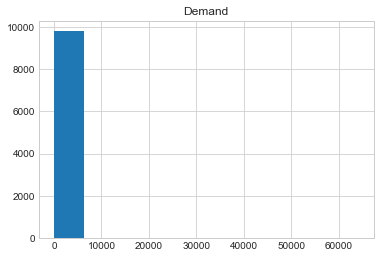

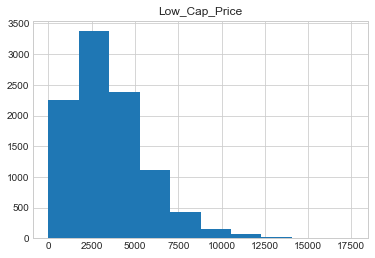

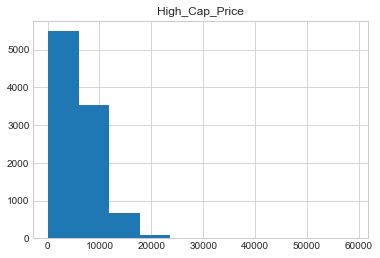

In [13]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Perhaps we should take the non-normal distributions and consider normalizing them?

                  Demand  Low_Cap_Price  High_Cap_Price
Demand          1.000000      -0.057482       -0.033971
Low_Cap_Price  -0.057482       1.000000        0.721021
High_Cap_Price -0.033971       0.721021        1.000000


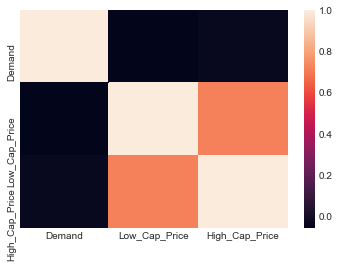

In [14]:
print(df_num.corr())
sns.heatmap(df_num.corr())

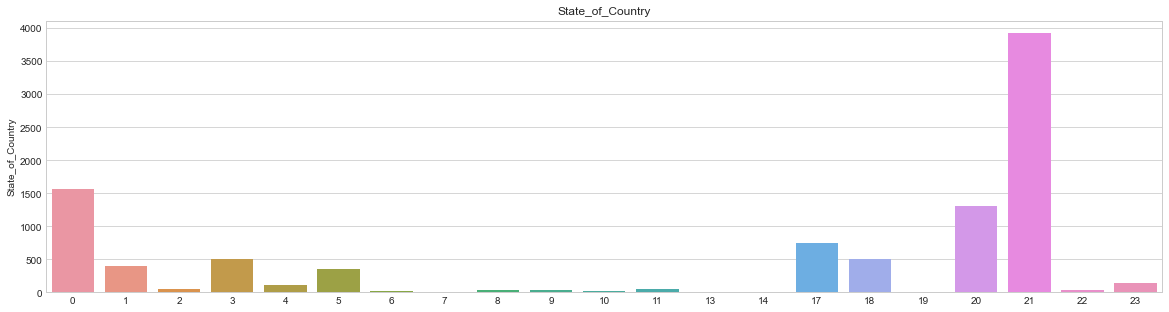

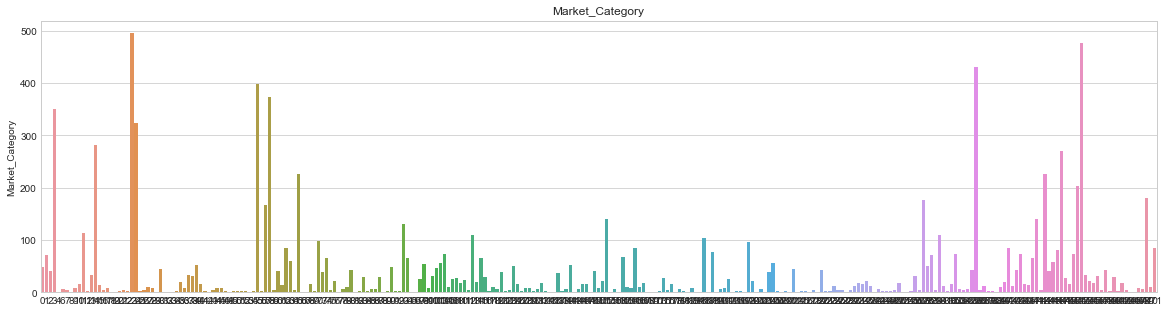

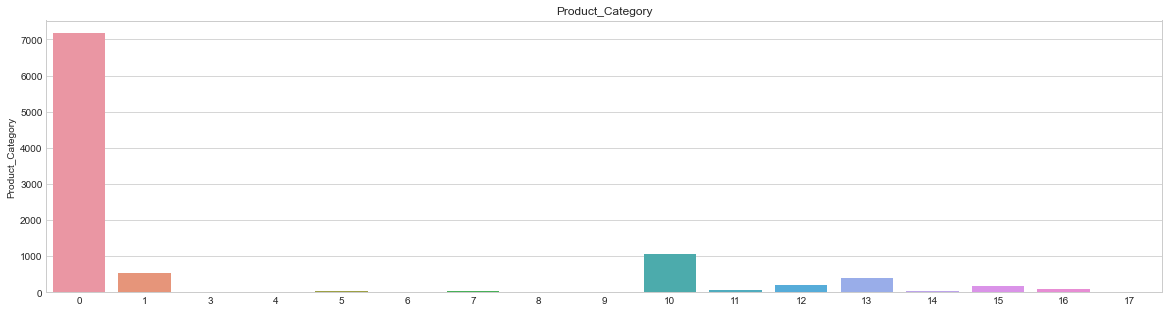

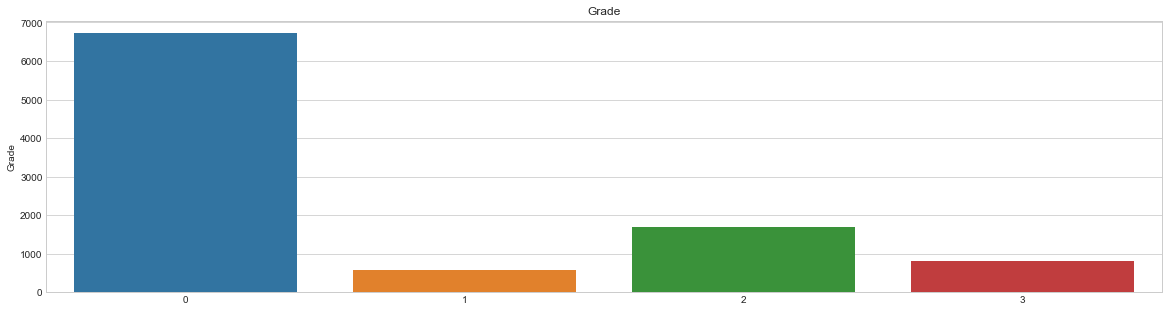

In [21]:
for i in df_cat.columns:
    fig = plt.figure(figsize=(20,5))
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

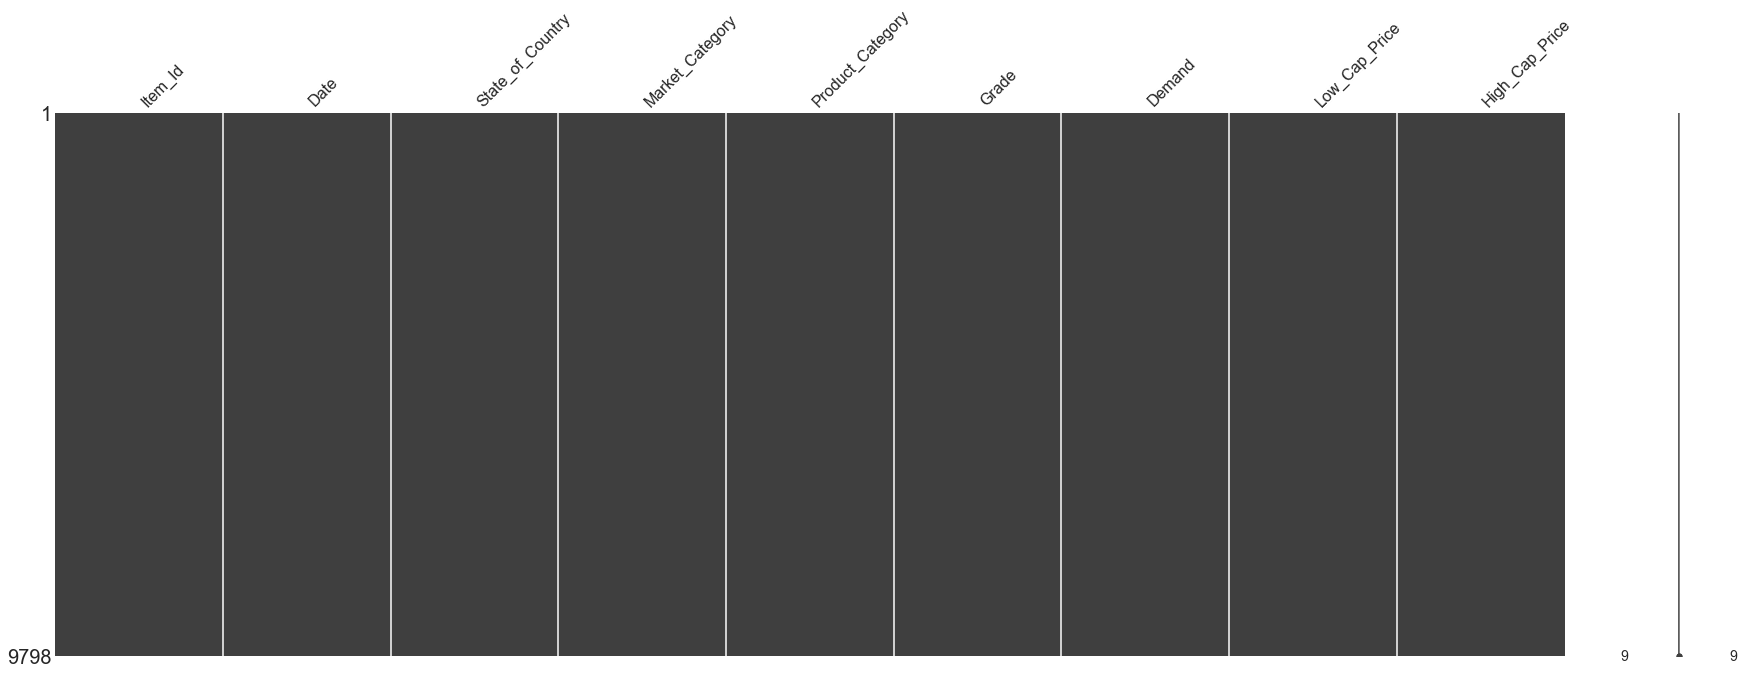

In [22]:
# Plot graphic of missing values for train data
missingno.matrix(train, figsize = (30,10))

In [23]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

In [24]:
total_train = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_2], axis=1, keys=['Total', '%'])
missing_data_train.head(5)

,Total,%
High_Cap_Price,0,0.0
Low_Cap_Price,0,0.0
Demand,0,0.0
Grade,0,0.0
Product_Category,0,0.0


Similarly i checked for missing data in test data

In [25]:
test.isnull().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
High_Cap_Price      0
dtype: int64

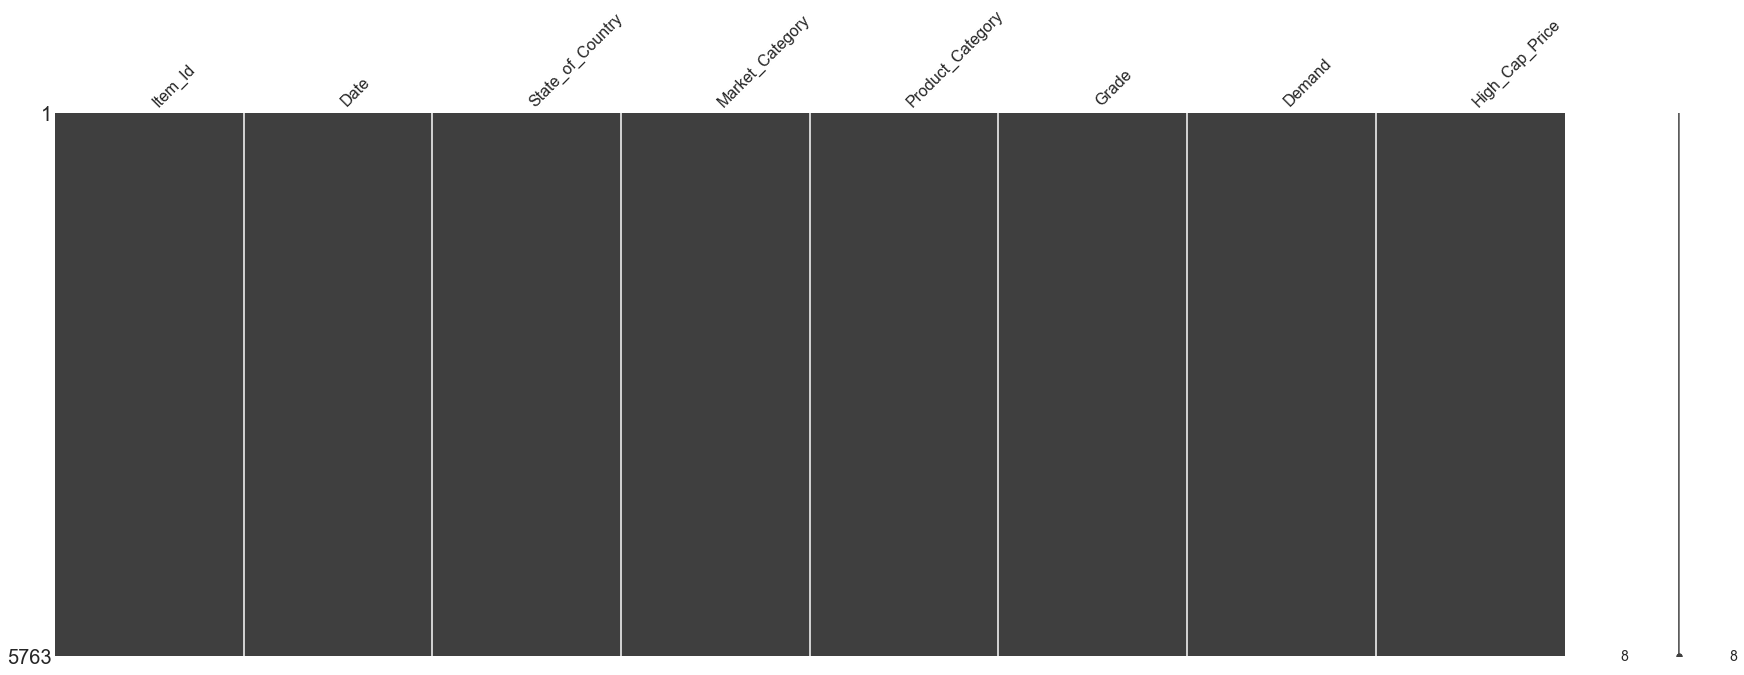

In [26]:
# Plot graphic of missing values
missingno.matrix(test, figsize = (30,10))

#### Include only relevant variables (Since we have limited data, I wanted to exclude things like ID and date so that we could have a reasonable number of features for our models to deal with)

In [27]:
df_train = train.copy()

In [28]:
df_test= test.copy()

In [39]:
df_train

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,0,0,0,0,0.5,2785,4240
1,0,1,0,0,0.7,3574,4756
2,0,103,0,1,1.6,5978,9669
3,0,103,0,0,0.0,5681,8313
4,0,103,0,2,0.0,4924,7257
...,...,...,...,...,...,...,...
9793,20,255,0,2,30.4,124,604
9794,9,60,1,3,1480.0,225,1461
9795,21,37,1,2,24.4,4721,6637
9796,21,469,0,0,2.3,5082,6997


In [40]:
df_train.drop(['Item_Id','Date'],axis=1,inplace=True)

KeyError: "['Item_Id' 'Date'] not found in axis"

In [31]:
df_test.drop(['Item_Id','Date'],axis=1,inplace=True)

In [38]:
df_train.Demand

0          0.5
1          0.7
2          1.6
3          0.0
4          0.0
         ...  
9793      30.4
9794    1480.0
9795      24.4
9796       2.3
9797       0.5
Name: Demand, Length: 9798, dtype: float64

## Start Building Machine Learning Models


### Let's seperate the data

In [45]:
# Split the dataframe into data and labels
X_train = df_train.drop('Low_Cap_Price', axis=1) # data
y_train = df_train['Low_Cap_Price'] # labels
X_test = df_test

In [46]:
# Shape of the data (without labels)
X_train.shape

(9798, 6)

In [47]:
# Shape of the labels
y_train.shape

(9798,)

In [48]:
# Shape of the test data
X_test.shape

(5763, 6)

In [49]:
X_train.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,0,0,0,0,0.5,4240
1,0,1,0,0,0.7,4756
2,0,103,0,1,1.6,9669
3,0,103,0,0,0.0,8313
4,0,103,0,2,0.0,7257


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import model_selection, tree, preprocessing, metrics, linear_model

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

### Building the Pipeline

The first step in building the pipeline is to define each transformer type. The convention here is generally to create transformers for the different variable types. In the code below I have created a numeric transformer which applies a StandardScaler, and includes a SimpleImputer to fill in any missing values.

We are building a basic pipeline with two steps,

* Normalize numerical features with StandardScaler()
* Run the Regressor


Trying out the following classification algorithms

* Linear Regression
* Lasso
* Ridge
* K-nearest Regressor
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* SVR

In [54]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE',Ridge())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))



results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -1931634.600537 (1309303.073528)
ScaledLASSO: -1931662.115227 (1309233.638304)
ScaledRIDGE: -1931632.270785 (1309213.210651)
ScaledKNN: -1673682.773732 (1267060.160901)
ScaledDT: -1752500.612343 (1196230.638548)
ScaledGBM: -1106514.273912 (856100.749137)
ScaledRF: -1041171.708159 (772658.814157)
ScaledSVR: -4074907.798661 (2490061.970915)


In [55]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = { 
            "n_estimators"      : [100,200,300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
model =RandomForestRegressor()
kfold =KFold(n_splits=10, random_state=21,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-786263.394549 (107307.108659) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
-783048.779158 (105322.515179) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}
-780565.244946 (110366.929000) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300}
-767817.734859 (107575.139074) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100}
-770444.728520 (109674.242273) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 200}
-764977.458720 (110590.050177) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 300}
-752443.721808 (108128.952278) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}
-756068.243174 (106015.261573) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators

In [56]:
grid_result.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_split=8,
                      n_estimators=300)

In [59]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

fin_model = RandomForestRegressor(max_features='sqrt', min_samples_split=8,
                      n_estimators=300)

fin_model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = fin_model.predict(rescaled_X_test)

In [60]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['Item_Id']=test['Item_Id']
submission['Low_Cap_Price'] = predictions # our model predictions on the test dataset
submission.head()

,Item_Id,Low_Cap_Price
0,IT_265079,3672.980428
1,IT_265087,2607.264687
2,IT_265107,4679.711229
3,IT_265139,7258.529993
4,IT_265142,1797.385595


In [61]:
# Convert submisison dataframe to csv for submission to csv 
# for HackerEarth submisison
submission.to_csv('rf1_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


## Feature Importance

Which features of the best model were most important for making predictions?

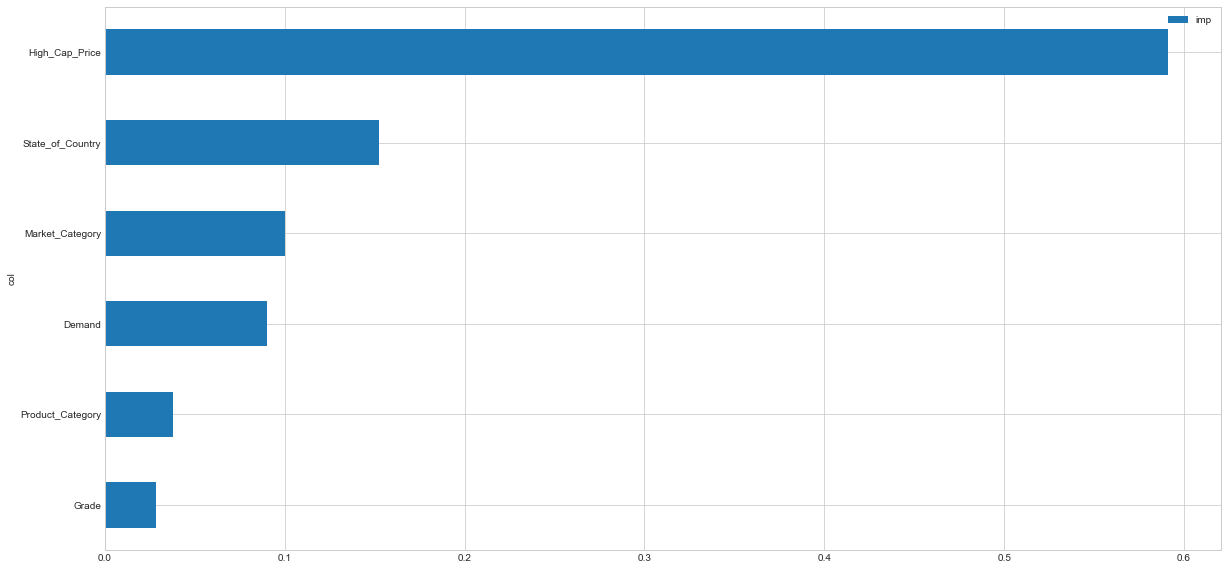

In [62]:
#Feature Importance
def feature_importance(model, data):
    
    fea_imp = pd.DataFrame({'imp': fin_model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True,False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

# Plot the feature importance scores
feature_importances = feature_importance(model, X_train)

In [64]:
feature_importances = feature_importances.sort_values(['imp'],ascending=False)

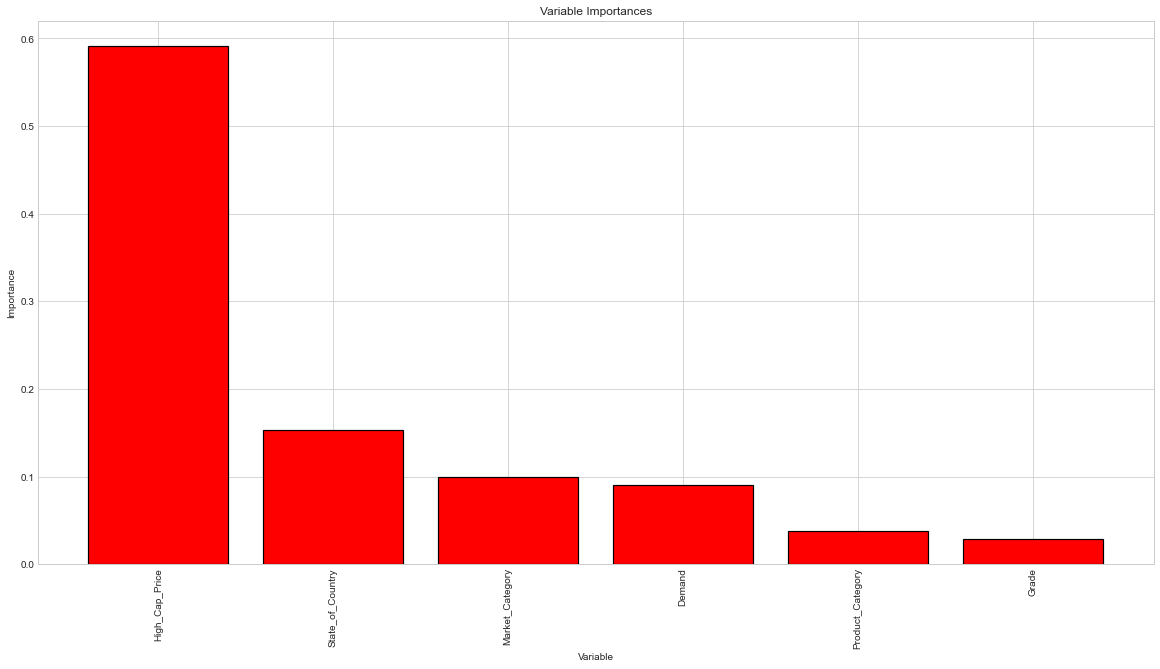

In [65]:
# list of x locations for plotting
x_values = list(range(len(feature_importances.imp)))# Make a bar chart
fig = plt.figure(figsize=(20,10))
plt.bar(x_values, feature_importances.imp, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)# Tick labels for x axis
plt.xticks(x_values, feature_importances.col, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

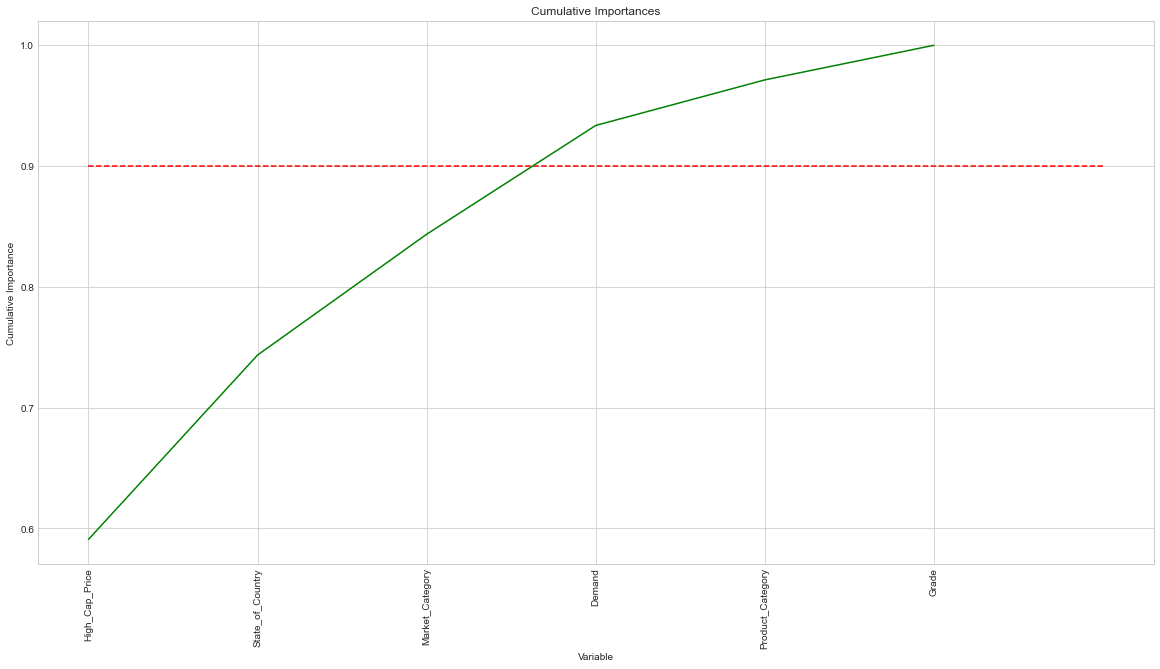

In [66]:
# List of features sorted from most to least important

sorted_importances = [importance for importance in feature_importances.imp]

sorted_features = [importance for importance in feature_importances.col]# Cumulative importances


cumulative_importances = np.cumsum(sorted_importances)# Make a line graph
fig = plt.figure(figsize=(20,10))
plt.plot(x_values, cumulative_importances, 'g-')# Draw line at 90% of importance retained

plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')# Format x ticks and labels

plt.xticks(x_values, sorted_features, rotation = 'vertical')# Axis labels and title

plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

We now use this to remove unimportant features. 90% is an arbitrary threshold, but if it leads to noticeably poor performance we can adjust the value. First, we need to find the exact number of features to exceed 90% importance:

In [67]:
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 4


In [68]:
# Extract the names of the most important features
important_feature_names = [feature for feature in feature_importances.col[:6]]


important_train_features = X_train[important_feature_names]
important_test_features = X_test[important_feature_names]# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (9798, 6)
Important test features shape: (5763, 6)


In [69]:
# Train the expanded model on only the important features
fin_model.fit(important_train_features, y_train)
# Make predictions on test data
final_predictions = fin_model.predict(important_test_features)

In [70]:
# Create a submisison dataframe and append the relevant columns
final_submission = pd.DataFrame()
final_submission['Item_Id']=test['Item_Id']
final_submission['Low_Cap_Price'] = predictions # our model predictions on the test dataset
final_submission.head()

,Item_Id,Low_Cap_Price
0,IT_265079,3672.980428
1,IT_265087,2607.264687
2,IT_265107,4679.711229
3,IT_265139,7258.529993
4,IT_265142,1797.385595


In [71]:
# Convert submisison dataframe to csv for submission to csv 
# for HackerEarth submisison
final_submission.to_csv('final_rf_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
